**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 5, 1)

df = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.shape

(4329, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4329 entries, 2007-10-05 to 2025-04-30
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4329 non-null   float64
 1   (High, POWERGRID.NS)    4329 non-null   float64
 2   (Low, POWERGRID.NS)     4329 non-null   float64
 3   (Open, POWERGRID.NS)    4329 non-null   float64
 4   (Volume, POWERGRID.NS)  4329 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 202.9 KB


In [5]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [6]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4329.000000,4329.000000,4329.000000,4329.000000,4.329000e+03
mean,85.321807,86.432373,84.222657,85.357119,1.194113e+07
std,72.307119,73.176863,71.392243,72.287294,2.036156e+07
min,18.908409,20.212437,16.952367,20.114634,0.000000e+00
25%,36.558762,37.104608,36.044956,36.640394,4.877060e+06
50%,62.081978,63.348972,61.355342,62.175155,8.503695e+06
75%,85.016449,86.098468,84.081014,85.105957,1.378256e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [7]:
df = df.reset_index()

In [8]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")

In [11]:
data01 = pd.read_csv("powergrid.csv")

In [16]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.385562896728516,35.250687901647105,26.767987163902312,28.90878314480242,855215656
2,1,2007-10-08,30.7276611328125,33.48011239976731,30.53450581530477,33.48011239976731,126671715
3,2,2007-10-09,32.82017135620117,33.109902182328575,29.085850801739035,30.74375909726689,116725709
4,3,2007-10-10,33.125999450683594,33.80204096867718,32.83626861907928,33.67327001215155,67931378


**Candelsticks**

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], high = data01['High'], low = data01['Low'], close = data01['Close'])])

fig.show()

In [17]:
df = df.drop(['Date'], axis = 1)

C:\Users\acer\AppData\Local\Temp\ipykernel_8336\1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



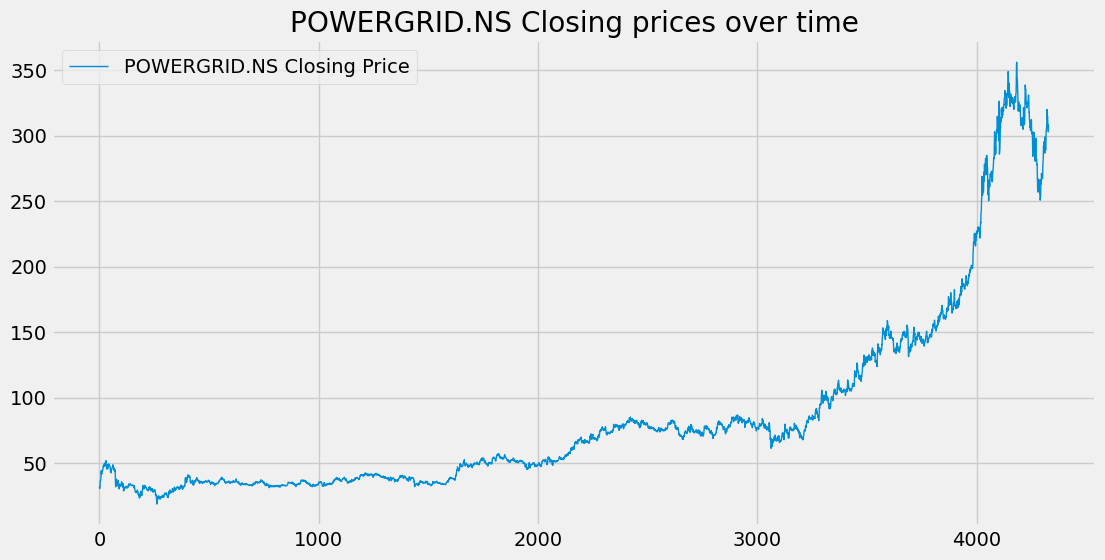

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

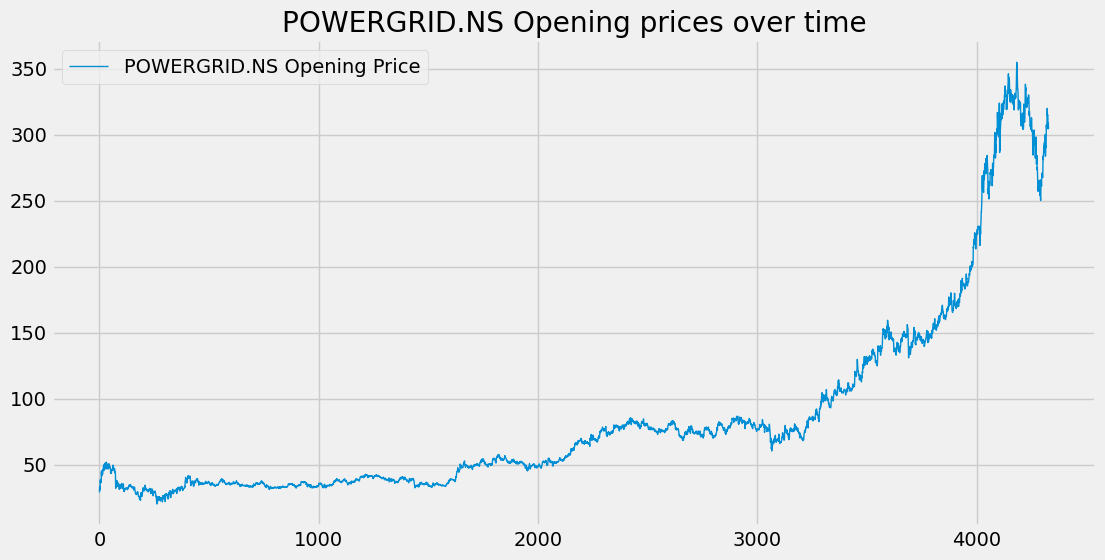

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

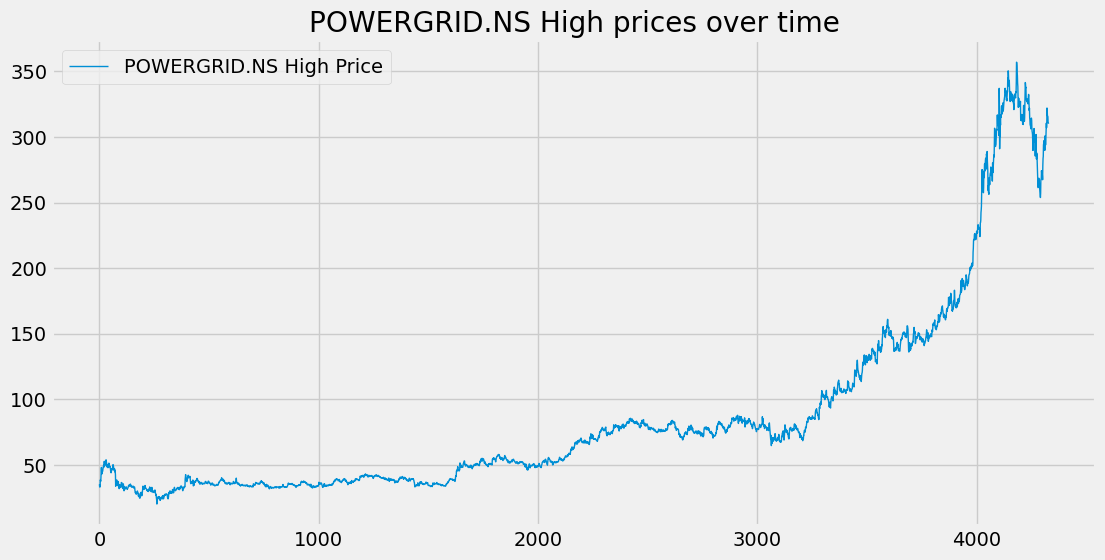

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

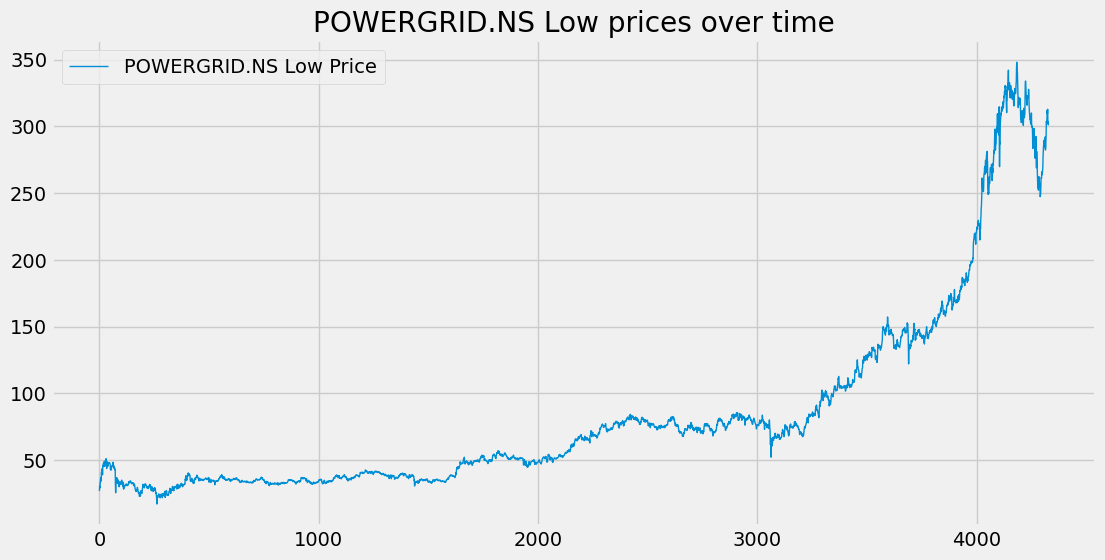

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'], label = f'{stock} Low Price', linewidth = 1)
plt.title(f'{stock} Low prices over time')
plt.legend()
plt.show()

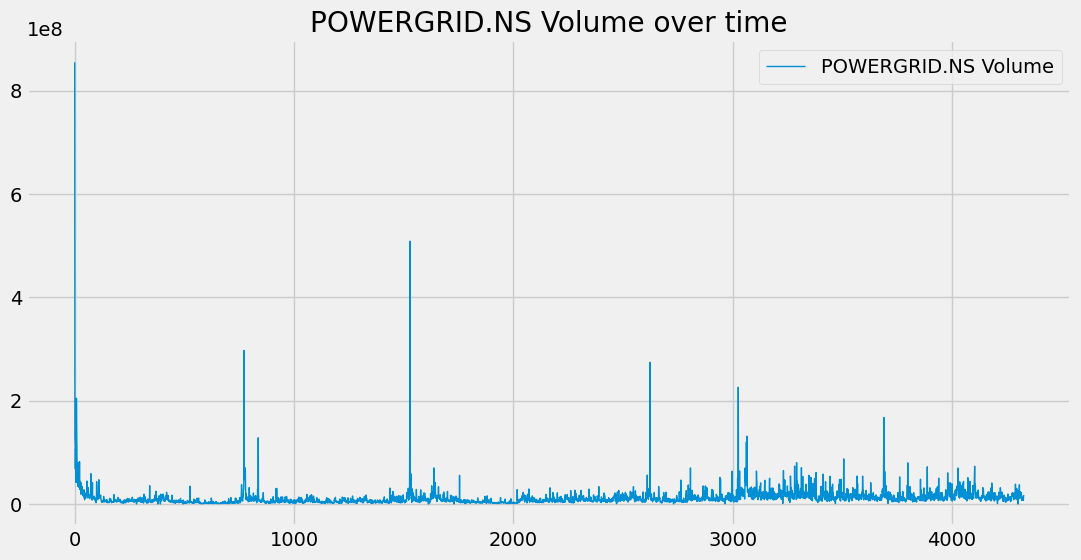

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 1)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

**Moving Average**

In [ ]:
ma100 = df.Close.rolling(100).mean()

In [45]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4324,292.321842
4325,292.088911
4326,291.918488
4327,291.707386


In [ ]:
ma200 = df.Close.rolling(200).mean()

In [46]:
ma200

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4324,309.181151
4325,309.094901
4326,308.997640
4327,308.872379


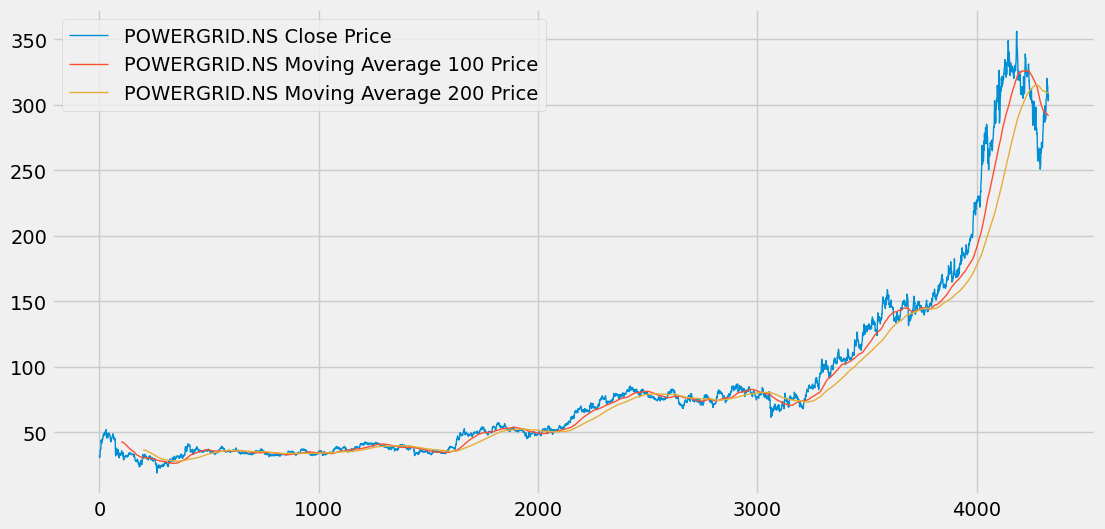

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [36]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

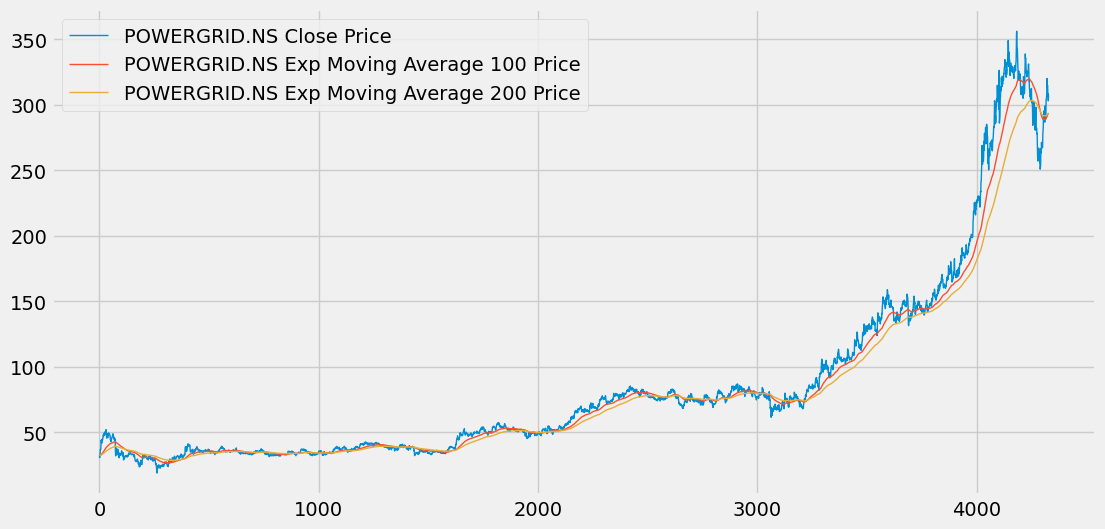

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

**Train & Test**

In [38]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [39]:
data_training.shape

(3030, 1)

In [40]:
data_testing.shape

(1299, 1)

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [42]:
data_training_array = scaler.fit_transform(data_training)

In [43]:
data_training_array

array([[0.1980858 ],
       [0.17371814],
       [0.20447363],
       ...,
       [0.91227653],
       [0.88840647],
       [0.87299628]])

In [47]:
data_training_array.shape[0]

3030

In [48]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [49]:
x_train.shape

(2930, 100, 1)

In [52]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [53]:
model = Sequential()

model.add(LSTM(units=50, activation ='relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation ='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 314ms/step - loss: 0.0991
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - loss: 0.0102
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 189ms/step - loss: 0.0082
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - loss: 0.0068
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - loss: 0.0056
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 156ms/step - loss: 0.0059
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 186ms/step - loss: 0.0061
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - loss: 0.0051
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 275ms/step - loss: 0.0046
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - loss: 0.0051
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - loss: 0.0043
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - loss: 0.0043
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - loss: 0.0039
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - loss: 0.0038
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [65]:
past_100_days = data_training.tail(100)

In [67]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [69]:
input_data = scaler.fit_transform(final_df)

In [71]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [72]:
x_test.shape

(1299, 100, 1)

In [73]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step


In [74]:
y_predicted.shape

(1299, 1)

In [75]:
scaler.scale_

array([0.00339369])

In [76]:
scaler_factor = 1/0.00339369
y_predicted = y_predicted*scaler_factor
y_test = y_test*scaler_factor

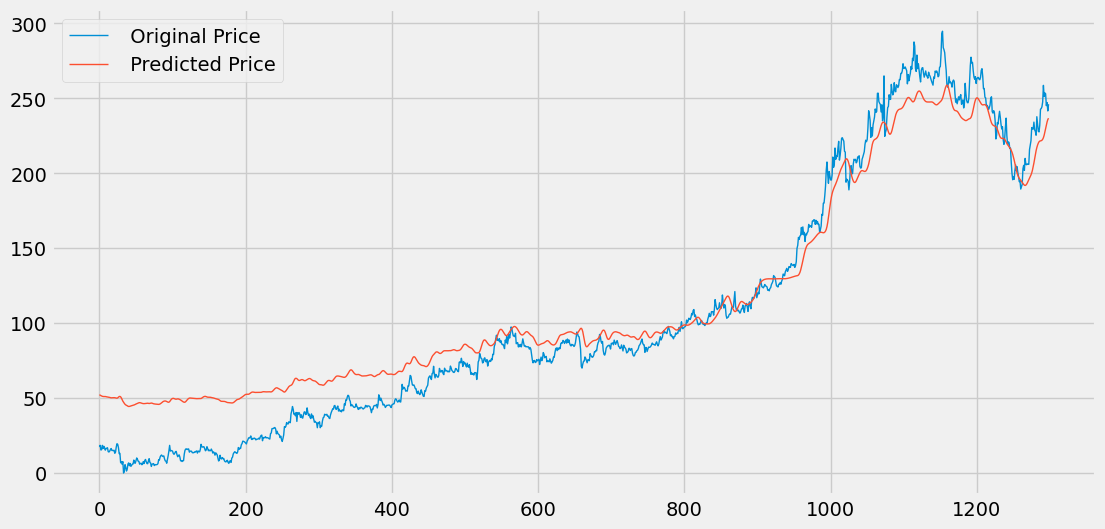

In [79]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label = ' Original Price',linewidth = 1)
plt.plot(y_predicted, label = ' Predicted Price',linewidth = 1)
plt.legend()
plt.show()

In [78]:
model.save('stock_dl_model.h5')